**EMPLOYEE DATASET**

`Background:`\
    Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced. 
In 2018 a staggering 41.4 million U.S. workers voluntarily left their jobs. Nationally, employee voluntary turnover exceeded 27%.If this trend to continue,U.S. voluntary turnover will hit 35% by 2023, placing companies in continuous and enormous risk. 

source:\
https://www.toolbox.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/ \
http://info.workinstitute.com/retentionreport2019




**Problem & Goal**

`Problems:`\
From the background above, company will having problems such as:
- **Reduced size of workforce**\
    This is could be problems when taking on the tasks because of small employee. Also will increase the workload volume for the remaining employees.
- **Potential to be costly**\
    Attrition due to job elimination could present problems when its come to unexpected event such as the death of an employee. Cost and risk will present itself

source:\
https://sprigghr.com/blog/hr-professionals/employee-attrition-vs-employee-turnover/

`Goal:`\
So, the goals from this exploratory Data Analysis is to **find the reason behind employees attrition** to helps company reduce human capital expense.

**`Another Insight:`**
- Mostly employees has around 2-3 yearwithCurrManager with around 3000-4000 monthly income
- Employees who leave workplace have more small TrainingTimesLastYear (just 2 Times) in all category JobSatisfaction
- The longer the total working years, the monthly income will increase
- Department that have highest Attrition in Bad WorkLifeBalance is Sales Department with Attrition around 37.5%, followed by Research & Development around 31.67%
- Employees who leave from workplace have more small monthlyIncome in all category of JobSatisfaction
- Employees who leave from workplace have more small Age in all category JobSatisfaction
- Employees who leave from workplace have more small YearsInCurrentRole in all category JobSatisfaction
- Employees from low Environtment Satisfaction mostly come from male employee
- Low environtment satisfaction comes from Single Marital Status

In [2]:
#Import some pakages to exploratory Data Analyst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sidetable

In [3]:
#Read dataset
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 02\DATASET\employee.csv')
df.head() #This syntax is use to show first 5th rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking the types of features 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
##Checking Missing Value
#This code use to know sum of missing value from every feature 
df.isnull().sum()
#from the result, there is no missing value from the feature

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

#Categorical Column
cat_cols=[i for i in df.columns if df.dtypes[i]=='object']
print('Categorical columns : {}'.format(len(cat_cols)))
print(cat_cols)

print('-'*65)

#Numeric Column
num_cols = [i for i in df.columns if df.dtypes[i]==('int64') or df.dtypes[i]==('float64')]
print('Numerical columns : {}'.format(len(num_cols)))
print(num_cols)

Categorical columns : 9
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
-----------------------------------------------------------------
Numerical columns : 26
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


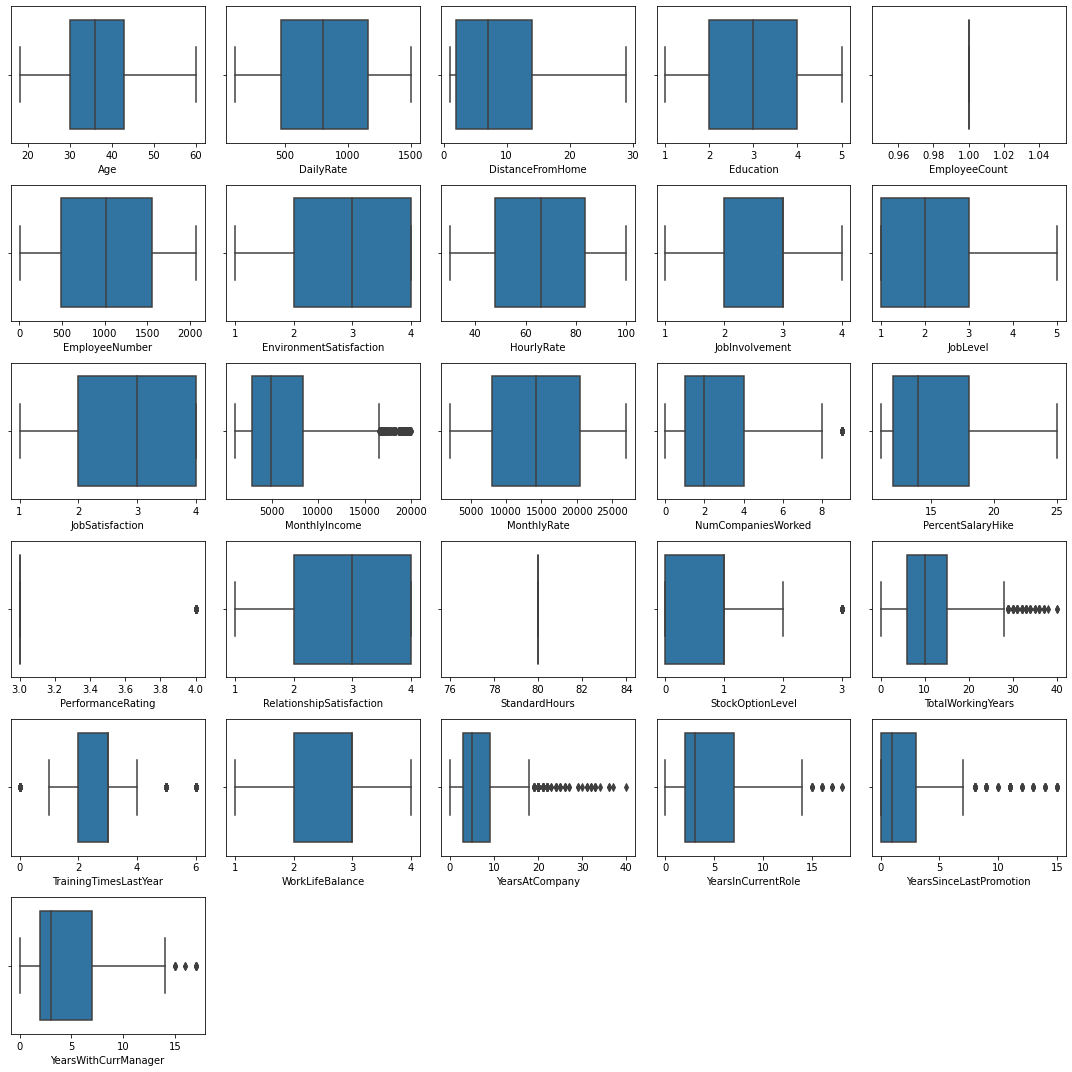

In [7]:
#Boxplot for numeric features
plt.figure(figsize=(15,15)) #This syntax is used to set the size of each boxplot
for i, cols in enumerate(num_cols): #iteration simultaneously between i (index) and cols (column)
    plt.subplot(6,5,i+1) #This syntax is used to adjust the number of rows, columns and the location of the boxplot (6,6, i + 1), i + 1 because indexing starts at 0
    sns.boxplot(df[cols])#code for making boxplot
    plt.tight_layout() #to adjust the boxplot to fit the layout size

#The purpose of making a boxplot is to detect features that have outliers so that they can be used to determine further actions in the analysis


In [8]:
#used .describe () to determine the data characteristics of each column.
#The use of .T is only used for transpose, making it easier to read
df.describe(include='object').T #using include='object' to show the categorical columns

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**New DataFrame for more easy analysis**

In [93]:
#The aims for separate between employees who quit and not quit is to make more easy when come to analyst
df_quit = df[df['Attrition']=='Yes']
df_stay = df[df['Attrition']=='No']

**Some features convert to categorical**

In [11]:
## EnvironmentSatisfaction
# df['EnvironmentSatisfaction'].replace({
#     1 : 'Low',
#     2 : 'Medium',
#     3 : 'High',
#     4 : 'Very High'
# }, inplace=True)


In [12]:
## Education
# df['Education'].replace({
#     1 : 'Below College',
#     2 : 'College',
#     3 : 'Bachelor',
#     4 : 'Master',
#     5 : 'Doctor'
# }, inplace=True)

In [13]:
## WorkLifeBalance
# df['WorkLifeBalance'].replace({
#     1 : 'Bad',
#     2 : 'Good',
#     3 : 'Better',
#     4 : 'Best'
# }, inplace=True)

In [18]:
# JobInvolvement
# df['JobInvolvement'].replace({
#     1 : 'Low',
#     2 : 'Medium',
#     3 : 'High',
#     4 : 'Very High'
# }, inplace=True)

In [41]:
# PerformanceRating
# df['PerformanceRating'].replace({
#     1 : 'Low',
#     2 : 'Good',
#     3 : 'Excellent',
#     4 : 'Outstanding'
# }, inplace=True)

In [44]:
# JobSatisfaction
# df['JobSatisfaction'].replace({
#     1 : 'Low',
#     2 : 'Medium',
#     3 : 'High',
#     4 : 'Very High'
# }, inplace=True)

## Analyst and Visualization

### **Univariate**

`1. Attrition`

In [9]:
#Using this code to know the percentage of employees who quit from company
df.stb.freq(['Attrition'])

#The data show imbalance attrition betweent 'Yes' and 'No'
#Where employess who quit just 16%

,Attrition,count,percent,cumulative_count,cumulative_percent
0,No,1233,83.877551,1233,83.877551
1,Yes,237,16.122449,1470,100.000000


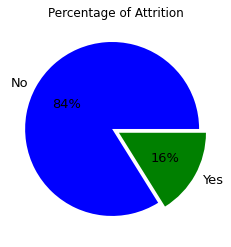

In [159]:
#Here are the visualize of percentage of Attrition using pie
persentase = [83.87, 16.12]
nama = ['No', 'Yes']

plt.pie( persentase, labels=nama,
        colors=[ 'blue', 'green'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.0f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Attrition')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()



`2. BusinessTravel`

In [10]:
#Using this code to know the percentage of BusinessTravel
df.stb.freq(['BusinessTravel'])

#The data show that Travel_Rarely have the highest percentage around 70.95%

,BusinessTravel,count,percent,cumulative_count,cumulative_percent
0,Travel_Rarely,1043,70.952381,1043,70.952381
1,Travel_Frequently,277,18.843537,1320,89.795918
2,Non-Travel,150,10.204082,1470,100.000000


`3. Department`

In [104]:
#Using this code to know the percentage of Department
df.stb.freq(['Department'])

# The data show that Research & Development have the highest percentage around 65.37%

,Department,count,percent,cumulative_count,cumulative_percent
0,Research & Development,961,65.374150,961,65.374150
1,Sales,446,30.340136,1407,95.714286
2,Human Resources,63,4.285714,1470,100.000000


`4. EducationField`

In [12]:
#Using this code to know the percentage of EducationField
df.stb.freq(['EducationField'])
# The data show that Life Sciences have the highest percentage around 41.22%

,EducationField,count,percent,cumulative_count,cumulative_percent
0,Life Sciences,606,41.224490,606,41.224490
1,Medical,464,31.564626,1070,72.789116
2,Marketing,159,10.816327,1229,83.605442
3,Technical Degree,132,8.979592,1361,92.585034
4,Other,82,5.578231,1443,98.163265
5,Human Resources,27,1.836735,1470,100.000000


`5. Gender`

In [26]:
#sidetable
df.stb.freq(['Gender'])
#This code to show the percentage of male and female

,Gender,count,percent,cumulative_count,cumulative_percent
0,Male,882,60.0,882,60.0
1,Female,588,40.0,1470,100.0


`6. JobRole`

In [13]:
df.stb.freq(['JobRole'])

#This code aims to find out the percentage of JobRole
#It appears that Sales Executives have a high percentage around 22.17% compared to others

,JobRole,count,percent,cumulative_count,cumulative_percent
0,Sales Executive,326,22.176871,326,22.176871
1,Research Scientist,292,19.863946,618,42.040816
2,Laboratory Technician,259,17.619048,877,59.659864
3,Manufacturing Director,145,9.863946,1022,69.523810
4,Healthcare Representative,131,8.911565,1153,78.435374
5,Manager,102,6.938776,1255,85.374150
6,Sales Representative,83,5.646259,1338,91.020408
7,Research Director,80,5.442177,1418,96.462585
8,Human Resources,52,3.537415,1470,100.000000


`7. MaritalStatus`

In [15]:
df.stb.freq(['MaritalStatus'])
#This code aims to find out the percentage of MaritalStatus
#It appears that Married have a high percentage around 45.78% compared to others

,MaritalStatus,count,percent,cumulative_count,cumulative_percent
0,Married,673,45.782313,673,45.782313
1,Single,470,31.972789,1143,77.755102
2,Divorced,327,22.244898,1470,100.000000


`8. OverTime`

In [16]:
df.stb.freq(['OverTime'])
#This code aims to find out the percentage of OverTime
#It appears that mostly employees didn't have OverTime

,OverTime,count,percent,cumulative_count,cumulative_percent
0,No,1054,71.70068,1054,71.70068
1,Yes,416,28.29932,1470,100.00000


### Bivariate / Multivariate

**`1. EnvironmentSatisfaction & Attrition`**

In [28]:
pd.crosstab(index = df['EnvironmentSatisfaction'], columns=df['Attrition'])

#The result show that Employees with low environtment satisfaction having the highest Attrition

Attrition,No,Yes
EnvironmentSatisfaction,,
High,391,62
Low,212,72
Medium,244,43
Very High,386,60


Text(0, 0.5, 'Counts')

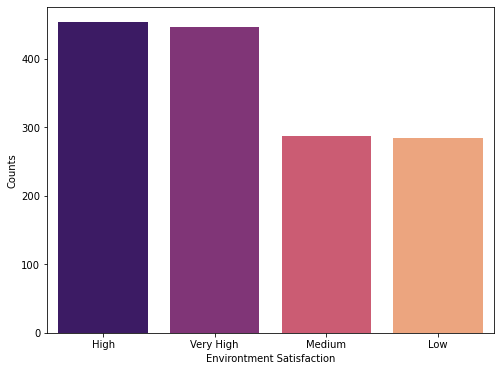

In [27]:
# EnvironmentSatisfaction

EnvCount = df['EnvironmentSatisfaction'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=EnvCount.index, y=EnvCount.values, palette='magma')
plt.xlabel('Environtment Satisfaction')
plt.ylabel('Counts')

#From the barplot, mostly employees having  high and very high environtment satisfaction
#medium and low environtment satisfaction have similar graph

In [170]:
#EnvironmentSatisfaction and attrition
((pd.crosstab(index = df['EnvironmentSatisfaction'], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

#This code aim to know ==> is low EnvironmentSatisfaction could be reason behind of attrition?
#from the crosstab below, low EnvironmentSatisfaction have the highest percentage of attrition with 25.35%
#while Very High EnvironmentSatisfaction has the smallest percentage (13.45%)

Attrition,No,Yes
EnvironmentSatisfaction,,
High,86.31,13.69
Low,74.65,25.35
Medium,85.02,14.98
Very High,86.55,13.45
All,83.88,16.12


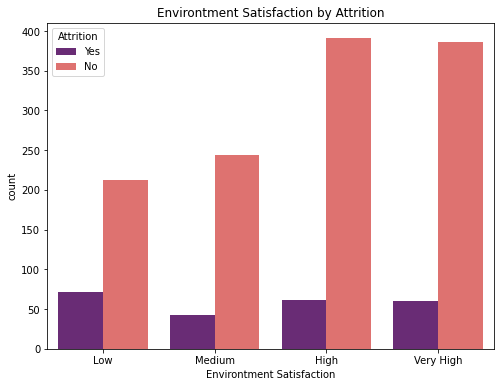

In [161]:
#This code aim to know which Environment Satisfaction that have high Attrition
plt.figure(figsize=(8,6))
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df['EnvironmentSatisfaction'], hue=df['Attrition'], palette='magma', order=order)
plt.xlabel('Environtment Satisfaction')
plt.title('Environtment Satisfaction by Attrition')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\EnvirontmentSatisfaction.png')

#The plot show that low Environment Satisfaction having the highest attrition
#This is make sense that employees with low Environment Satisfaction prefer to quit from company

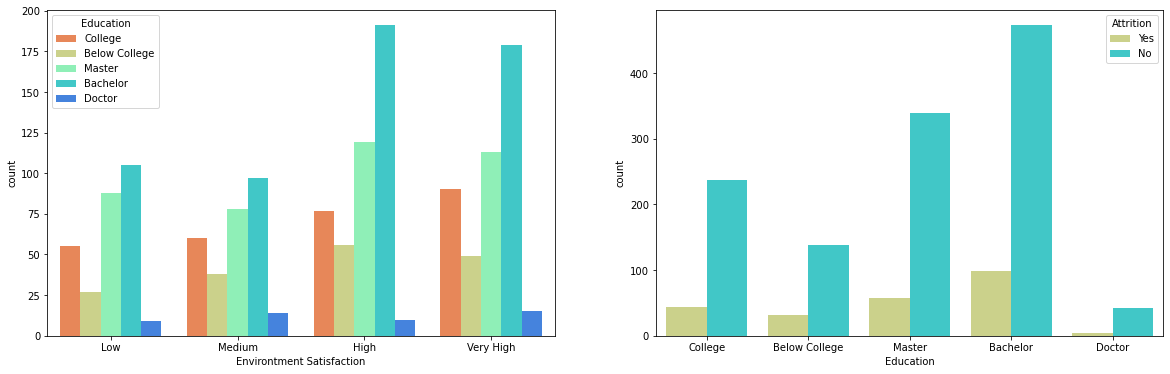

In [44]:
# Education, Environment Satisfaction 
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df['EnvironmentSatisfaction'], hue=df['Education'], palette='rainbow_r', order=order)
plt.xlabel('Environtment Satisfaction')

plt.subplot(1,2,2)
sns.countplot(x=df['Education'], hue=df['Attrition'], palette='rainbow_r')

#Low environtment Satisfaction comes from Bachelor Education

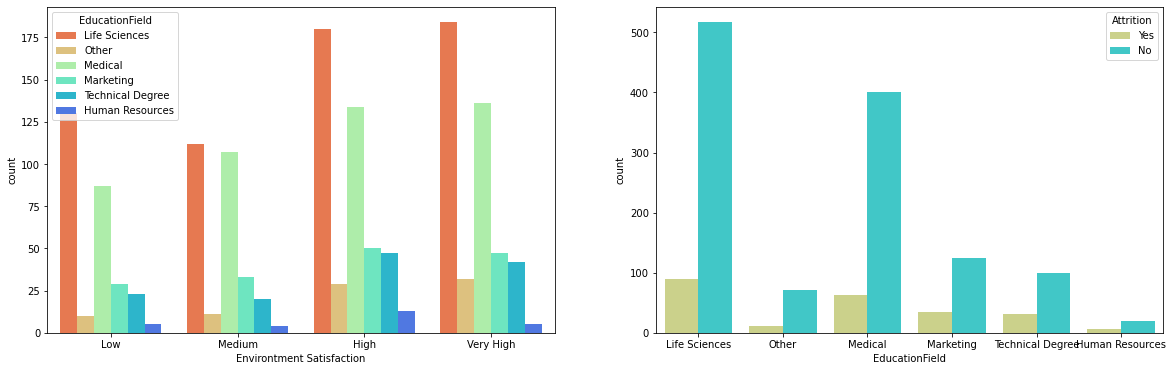

In [46]:
# EducationField, Environment Satisfaction 
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df['EnvironmentSatisfaction'], hue=df['EducationField'], palette='rainbow_r', order=order)
plt.xlabel('Environtment Satisfaction')

plt.subplot(1,2,2)
sns.countplot(x=df['EducationField'], hue=df['Attrition'], palette='rainbow_r')

#Low environtment Satisfaction comes from Life Science Education Field
#While Human Resources mostly having High Environtment Satisfaction so it has the smallest employees to quit

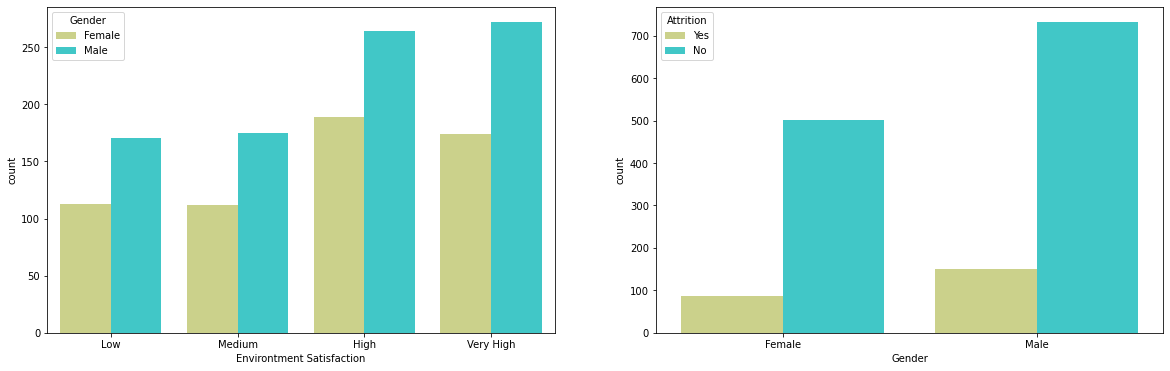

In [47]:
# Gender, Environment Satisfaction 
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df['EnvironmentSatisfaction'], hue=df['Gender'], palette='rainbow_r', order=order)
plt.xlabel('Environtment Satisfaction')

plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], hue=df['Attrition'], palette='rainbow_r')

#The employees from low Environtment mostly come from male employees

Text(0.5, 1.0, 'Over Time of Employees')

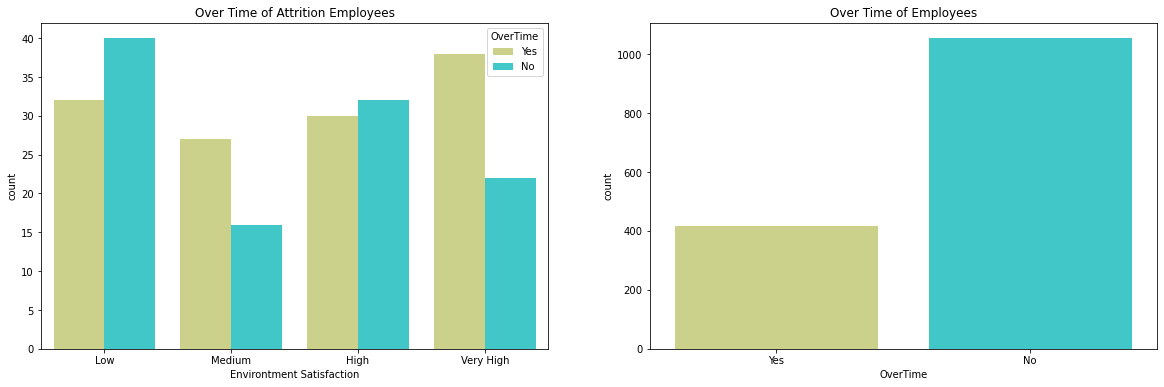

In [56]:
# OverTime, Environment Satisfaction 
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df_quit['EnvironmentSatisfaction'], hue=df_quit['OverTime'], palette='rainbow_r', order=order)
plt.xlabel('Environtment Satisfaction')
plt.title('Over Time of Attrition Employees')

plt.subplot(1,2,2)
sns.countplot(x=df['OverTime'], palette='rainbow_r')
plt.title('Over Time of Employees')

#The aim from this plot is to know wheter low environtment Satisfaction caused by to Over Time
#The employees of the company mostly not over time
#Suprisingly that Very High environtment Satisfaction has the highest Over Time while low environtment Satisfaction comes second place

Text(0.5, 1.0, 'Marital Status of Employees')

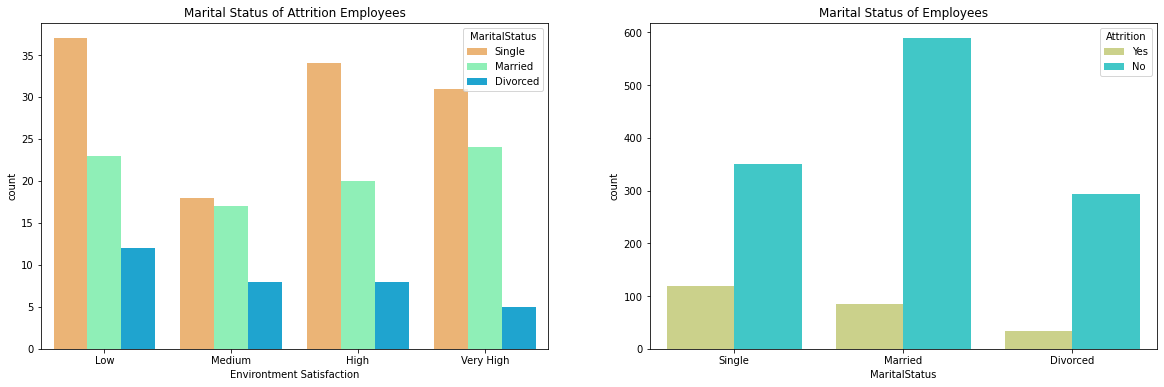

In [53]:
# MaritalStatus, Environment Satisfaction 

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x=df_quit['EnvironmentSatisfaction'], hue=df_quit['MaritalStatus'], palette='rainbow_r', order=order)
plt.xlabel('Environtment Satisfaction')
plt.title('Marital Status of Attrition Employees')

plt.subplot(1,2,2)
sns.countplot(x=df['MaritalStatus'], hue=df['Attrition'], palette='rainbow_r')
plt.title('Marital Status of Employees')

#the idea from this code is to know low environtment satisfaction comes from what Marital Status
#the results show that Single has the highest attrition (right plot), its linier with low environtment satisfaction that also show single as the highest attrition

**`2. Job Involvement & Attrition`**

In [105]:
#JobInvolvement and attrition
((pd.crosstab(index = df['JobInvolvement'], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

#This code aim to know ==> is low JobInvolvement could be reason behind of attrition?
#from the crosstab below, low JobInvolvement have the highest percentage of attrition with 33.73%
#while Very High JobInvolvement has the smallest percentage (9.03%)

Attrition,No,Yes
JobInvolvement,,
High,85.60,14.40
Low,66.27,33.73
Medium,81.07,18.93
Very High,90.97,9.03
All,83.88,16.12


In [113]:
#This code aim to make a DataFrame to visualize
Job_Inv = {
    'Yes_Percent' : [14.60, 33.73, 18.93, 9.03],
    'No_Percent' : [85.60, 66.27, 81.07, 90.97],
    'Inv':['High', 'Low', 'Medium', 'Very High']
}


pd.DataFrame(data=Job_Inv)

,Yes_Percent,No_Percent,Inv
0,14.60,85.60,High
1,33.73,66.27,Low
2,18.93,81.07,Medium
3,9.03,90.97,Very High


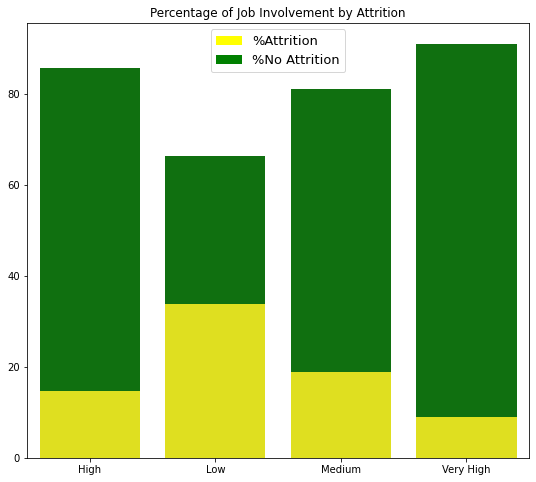

In [162]:
#Here are the visualize of percentage of JobInvolvement & Attrition using stacked bar
plt.figure(figsize=(9,8))
#plot 1 - backgroud - NoAttrition
sns.barplot(x=Job_Inv['Inv'], y=Job_Inv['No_Percent'], color='green')

#plot 2 - YesAttrion
sns.barplot(x=Job_Inv['Inv'], y=Job_Inv['Yes_Percent'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Attrition', '%No Attrition'], loc='best', ncol = 1, prop={'size':13})

plt.title('Percentage of Job Involvement by Attrition')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\JobInvolvement.png')
plt.show()

In [174]:
pd.crosstab(index=[df['JobInvolvement'], df['Attrition']], columns=df['Gender'])

#This code aim to know what gender mostly leave from workplace according to JobInvolvement

Gender                    Female  Male
JobInvolvement Attrition              
High           No            299   444
               Yes            46    79
Low            No             19    36
               Yes            12    16
Medium         No            136   168
               Yes            23    48
Very High      No             47    84
               Yes             6     7

In [178]:
pd.crosstab(index = df['JobInvolvement'], columns=df['Attrition'], values=df['TrainingTimesLastYear'], aggfunc='median')

#This aim code to know median TrainingTimesLastYear by JobInvolvment, Attrition
#The result show that employees who Attrition have more small TrainingTimesLastYear in medium and Very High category JobSatisfaction

Attrition,No,Yes
JobInvolvement,,
High,3,3
Low,3,3
Medium,3,2
Very High,3,2


**`3. Work Life Balance Features & Attrition`**

In [74]:
df.stb.freq(['WorkLifeBalance'])

#This code aim to know ==> what's WorkLifeBalance that employees mostly have
#Mostly employees have Better WorkLifeBalance with percentage arount 61%

,WorkLifeBalance,count,percent,cumulative_count,cumulative_percent
0,Better,893,60.748299,893,60.748299
1,Good,344,23.401361,1237,84.149660
2,Best,153,10.408163,1390,94.557823
3,Bad,80,5.442177,1470,100.000000


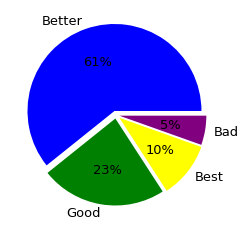

In [135]:
#Here are the visualize of percentage of WorkLifeBalance using pie
persentase = [60.74, 23.40, 10.40, 5.44]
nama = ['Better', 'Good', 'Best', 'Bad']

plt.pie( persentase, labels=nama,
        colors=[ 'blue', 'green', 'yellow','purple'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.0f%%',
        radius=1,
        explode=(.05, .04, .05, .04)
)
plt.show()

In [87]:
#WorkLifeBalance
((pd.crosstab(index = df['WorkLifeBalance'], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

#This code aim to know ==> what's WorkLifeBalance that have the high attrition
#The crostab ahow that Bad WorkLifeBalance has the highest attrition with percentage arround 31.35%

Attrition,No,Yes
WorkLifeBalance,,
Bad,68.75,31.25
Best,82.35,17.65
Better,85.78,14.22
Good,83.14,16.86
All,83.88,16.12


In [128]:
#This code aim to make a DataFrame to visualize
work= {
    'Yes_Percent' : [31.25, 17.65, 14.22, 16.86],
    'No_Percent' : [68.75, 82.25, 85.78, 83.14],
    'WLB':['Bad', 'Best', 'Better', 'Good']
}

pd.DataFrame(data=work)

,Yes_Percent,No_Percent,WLB
0,31.25,68.75,Bad
1,17.65,82.25,Best
2,14.22,85.78,Better
3,16.86,83.14,Good


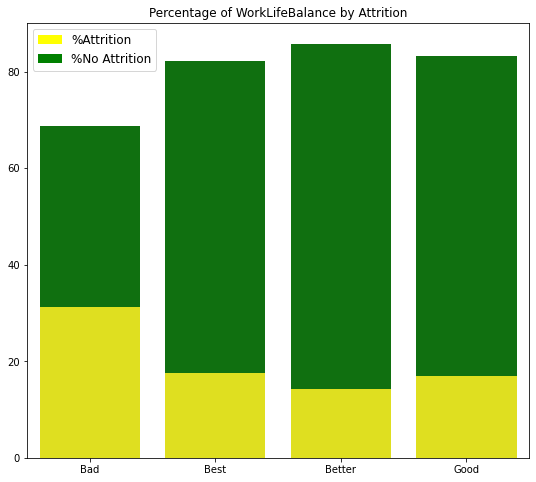

In [163]:
#Here are the visualize of percentage of WorkLifeBalance & Attrition using stacked bar
plt.figure(figsize=(9,8))
#plot 1 - backgroud - NoAttrition
sns.barplot(x=work['WLB'], y=work['No_Percent'], color='green')

#plot 2 - YesAttrion
sns.barplot(x=work['WLB'], y=work['Yes_Percent'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Attrition', '%No Attrition'], loc='best', ncol = 1, prop={'size':12})

plt.title('Percentage of WorkLifeBalance by Attrition')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\WorkLifeBalance.png')
plt.show()

In [38]:
#JobInvolvement and attrition, work life balance
((pd.crosstab(index = [df['WorkLifeBalance'], df['JobInvolvement']], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

# This code aim to know ==> what's WorkLifeBalance that have the high attrition by JobInvolvement
# The crosstab show that Bad WorkLifeBalance has the highest attrition around 75% from Low JobInvolvment

Attrition                           No    Yes
WorkLifeBalance JobInvolvement               
Bad             High             70.59  29.41
                Low              25.00  75.00
                Medium           63.16  36.84
                Very High       100.00   0.00
Best            High             83.33  16.67
                Low              83.33  16.67
                Medium           75.61  24.39
                Very High       100.00   0.00
Better          High             87.60  12.40
                Low              71.70  28.30
                Medium           83.69  16.31
                Very High        89.01  10.99
Good            High             85.37  14.63
                Low              55.00  45.00
                Medium           80.49  19.51
                Very High        91.89   8.11
All                              83.88  16.12

In [39]:
#BusinessTravel and attrition, work life balance
((pd.crosstab(index = [df['WorkLifeBalance'], df['BusinessTravel']], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

# This code aim to know ==> what's WorkLifeBalance that have the high attrition by BusinessTravel
# The crosstab show that Bad WorkLifeBalance has the highest attrition around 46.15% from Travel_Frequently BusinessTravel

Attrition                             No    Yes
WorkLifeBalance BusinessTravel                 
Bad             Non-Travel         87.50  12.50
                Travel_Frequently  53.85  46.15
                Travel_Rarely      69.49  30.51
Best            Non-Travel         89.47  10.53
                Travel_Frequently  73.33  26.67
                Travel_Rarely      83.65  16.35
Better          Non-Travel         94.19   5.81
                Travel_Frequently  76.19  23.81
                Travel_Rarely      87.17  12.83
Good            Non-Travel         89.19  10.81
                Travel_Frequently  77.27  22.73
                Travel_Rarely      83.82  16.18
All                                83.88  16.12

In [40]:
#work life balance, OverTime and attrition
((pd.crosstab(index = [df['WorkLifeBalance'], df['OverTime']], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

# This code aim to know ==> what's WorkLifeBalance that have the high attrition by OverTime
# The crosstab show that Bad WorkLifeBalance has the highest attrition around 46.45% from Yes OverTime

Attrition                    No    Yes
WorkLifeBalance OverTime              
Bad             No        74.14  25.86
                Yes       54.55  45.45
Best            No        87.18  12.82
                Yes       66.67  33.33
Better          No        91.55   8.45
                Yes       71.26  28.74
Good            No        89.17  10.83
                Yes       69.23  30.77
All                       83.88  16.12

**`4. PerformanceRating & Attrition`**

In [42]:
df.stb.freq(['PerformanceRating'])
#This code to show frequency of PerformanceRating
#Employees of the company have only 'Excellent' and 'Outstanding' PerformanceRating

,PerformanceRating,count,percent,cumulative_count,cumulative_percent
0,Excellent,1244,84.62585,1244,84.62585
1,Outstanding,226,15.37415,1470,100.00000


In [43]:
((pd.crosstab(index = df['PerformanceRating'], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

#This code to show frequency of PerformanceRating by attrition
#Both 'Excellent' and 'Outstanding' PerformanceRating have similar Attrition around 16%

Attrition,No,Yes
PerformanceRating,,
Excellent,83.92,16.08
Outstanding,83.63,16.37
All,83.88,16.12


**`5. Job Satisfaction & Attrition`**

In [45]:
df.stb.freq(['JobSatisfaction'])
#This code to show frequency of JobSatisfaction

,JobSatisfaction,count,percent,cumulative_count,cumulative_percent
0,Very High,459,31.224490,459,31.224490
1,High,442,30.068027,901,61.292517
2,Low,289,19.659864,1190,80.952381
3,Medium,280,19.047619,1470,100.000000


In [46]:
#JobSatisfaction & Attrition
((pd.crosstab(index = df['JobSatisfaction'], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)
# This code aim to know ==> what's JobSatisfaction that have the high attrition 
# The crosstab show that Low JobSatisfaction has the highest attrition around 22.84% 

Attrition,No,Yes
JobSatisfaction,,
High,83.48,16.52
Low,77.16,22.84
Medium,83.57,16.43
Very High,88.67,11.33
All,83.88,16.12


In [139]:
#This code aim to make a DataFrame to visualize
JobSa= {
    'Yes_Percent' : [16.52, 22.84, 16.43, 11.33],
    'No_Percent': [83.48, 77.16, 83.57, 88.67],
    'Job_satis':['High', 'Low', 'Medium', 'Very High']
}

pd.DataFrame(data=JobSa)

,Yes_Percent,No_Percent,Job_satis
0,16.52,83.48,High
1,22.84,77.16,Low
2,16.43,83.57,Medium
3,11.33,88.67,Very High


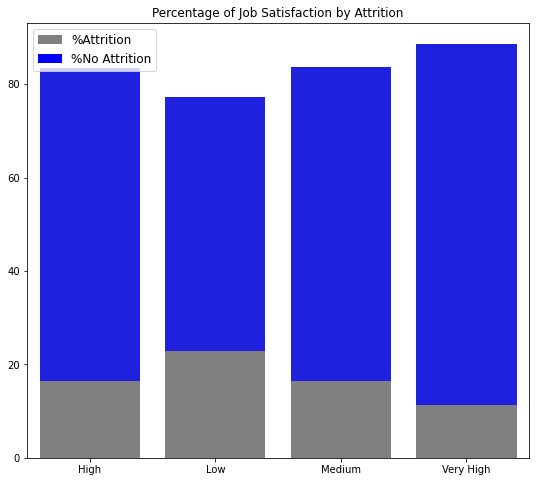

In [164]:
#This code is used to visualize the percentage of Job Satisfaction by Attrition only using stacked bar

plt.figure(figsize=(9,8))
#plot 1 - backgroud - NoAttrition
sns.barplot(x=JobSa['Job_satis'], y=JobSa['No_Percent'], color='blue')

#plot 2 - YesAttrion
sns.barplot(x=JobSa['Job_satis'], y=JobSa['Yes_Percent'], color='grey')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='grey',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Attrition', '%No Attrition'], loc='upper left', ncol = 1, prop={'size':12})


plt.title('Percentage of Job Satisfaction by Attrition')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\JobSatisfaction.png')
plt.show()

In [58]:
#JobSatisfaction , Attrition, MonthlyIncome
pd.crosstab(index = df['JobSatisfaction'], columns=df['Attrition'], values=df['MonthlyIncome'], aggfunc='median')

#This aim code to know median of monthlyIncome by JobSatisfaction , Attrition
#Median is used because there is outliers from monthlyIncome feature
#The result show that employees who Attrition have more small monthlyIncome in all category JobSatisfaction

Attrition,No,Yes
JobSatisfaction,,
High,5042.0,3441.0
Low,5373.0,3260.0
Medium,5178.0,2811.5
Very High,5231.0,3167.0


In [61]:
# YearsInCurrentRole, JobSatisfaction , Attrition
pd.crosstab(index = df['JobSatisfaction'], columns=df['Attrition'], values=df['YearsInCurrentRole'], aggfunc='median')

#This aim code to know median of YearsInCurrentRole by JobSatisfaction , Attrition
#Median is used because there is outliers from YearsInCurrentRole feature
#The result show that employees who Attrition have more small YearsInCurrentRole in all category JobSatisfaction

Attrition,No,Yes
JobSatisfaction,,
High,3,2
Low,3,2
Medium,3,2
Very High,3,2


In [62]:
# Age, JobSatisfaction , Attrition
pd.crosstab(index = df['JobSatisfaction'], columns=df['Attrition'], values=df['Age'], aggfunc='mean')

#This aim code to know mean of Age by JobSatisfaction , Attrition
#The result show that employees who Attritin have more small Age in all category JobSatisfaction

Attrition,No,Yes
JobSatisfaction,,
High,37.647696,33.863014
Low,38.008969,33.227273
Medium,37.700855,33.347826
Very High,37.157248,33.961538


In [63]:
# TrainingTimesLastYear, JobSatisfaction , Attrition
pd.crosstab(index = df['JobSatisfaction'], columns=df['Attrition'], values=df['TrainingTimesLastYear'], aggfunc='median')

#This aim code to know median of TrainingTimesLastYear by JobSatisfaction & Attrition
#The result show that employees who Attrition have more small TrainingTimesLastYear in all category JobSatisfaction

Attrition,No,Yes
JobSatisfaction,,
High,3,2
Low,3,2
Medium,3,2
Very High,3,3


In [69]:
# PercentSalaryHike, JobSatisfaction , Attrition
((pd.crosstab(index = [df['JobSatisfaction'], df['Attrition']], columns=df['PercentSalaryHike'], normalize='columns', margins=True))*100).round(2)

PercentSalaryHike             11     12     13     14     15     16     17  \
JobSatisfaction Attrition                                                    
High            No         23.81  25.76  22.97  29.35  18.81  24.36  34.15   
                Yes         7.14   7.07   4.78   4.98   3.96   5.13   3.66   
Low             No         14.76  16.67  16.75  15.92  15.84  20.51   9.76   
                Yes         4.29   2.53   4.31   2.99   5.94   1.28  10.98   
Medium          No         17.62  16.67  15.79  13.93  17.82  19.23   9.76   
                Yes         3.33   4.04   2.87   0.50   4.95   5.13   2.44   
Very High       No         24.29  24.24  28.23  28.86  29.70  17.95  29.27   
                Yes         4.76   3.03   4.31   3.48   2.97   6.41   0.00   

PercentSalaryHike             18     19     20     21     22     23     24  \
JobSatisfaction Attrition                                                    
High            No         24.72  30.26  25.45  29.17  14.29  14.29  23.81   
                Yes         4.49   3.95   3.64   0.00   3.57   0.00   9.52   
Low             No          8.99  15.79  12.73  20.83   8.93  10.71   9.52   
                Yes         2.25   3.95   7.27   6.25  10.71  10.71   0.00   
Medium          No         17.98  14.47  16.36  14.58  21.43  14.29   9.52   
                Yes         3.37   2.63   1.82   2.08   3.57   7.14   4.76   
Very High       No         33.71  27.63  32.73  25.00  33.93  39.29  28.57   
                Yes         4.49   1.32   0.00   2.08   3.57   3.57  14.29   

PercentSalaryHike             25    All  
JobSatisfaction Attrition                
High            No         27.78  25.10  
                Yes         0.00   4.97  
Low             No         27.78  15.17  
                Yes         0.00   4.49  
Medium          No          5.56  15.92  
                Yes         5.56   3.13  
Very High       No         33.33  27.69  
                Yes         0.00   3.54

`6. MonthlyIncome`

<Figure size 576x432 with 0 Axes>

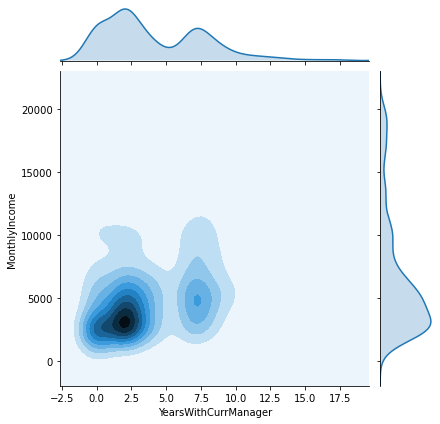

In [54]:
# MontlyIncome & YearsWithCurrManager
plt.figure(figsize=(8,6))
sns.jointplot(y=df['MonthlyIncome'], x=df['YearsWithCurrManager'], kind='kde')

#This code aim to know the distribution of data bentween MontlyIncome & YearsWithCurrManager
#As the result show that mostly employees has around 2-3 yearwithCurrManager with around 3000-4000 monthly income

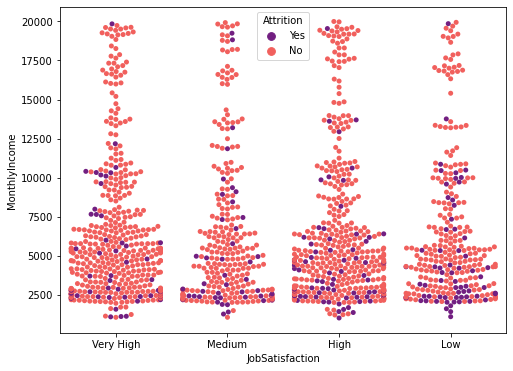

In [57]:
# MontlyIncome and attrition
plt.figure(figsize=(8,6))
sns.swarmplot(x=df['JobSatisfaction'], y=df['MonthlyIncome'], hue=df['Attrition'],palette='magma')

#This code aim to visualize the spread of MonthlyIncome for every JobSatisfaction

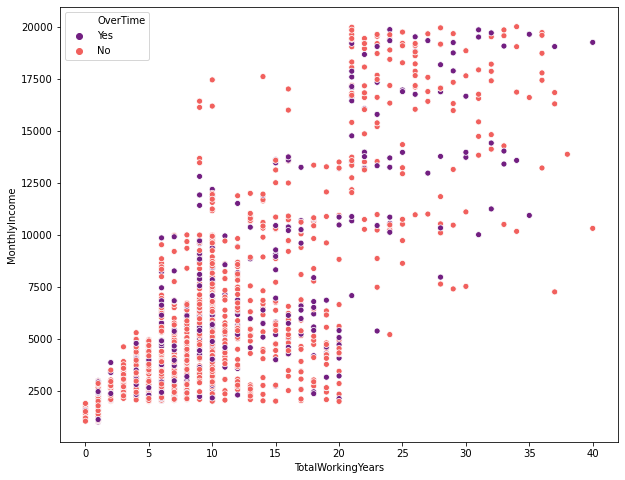

In [152]:
# TotalWorkingYears & OverTime
plt.figure(figsize=(10,8))
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='OverTime',data=df, palette='magma')

#This plot aims to see the relationship between TotalWorkingYears and MonthlyIncome which is divided based on Overtime or not
#It can be seen that the longer the total working years, the monthly income will increase

`7. Age `

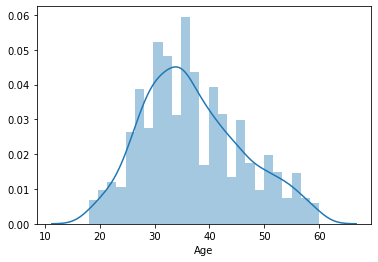

In [15]:
#Age
sns.distplot(df['Age'], bins=25)
plt.show()

#This code aim to visualize the distribution of Age

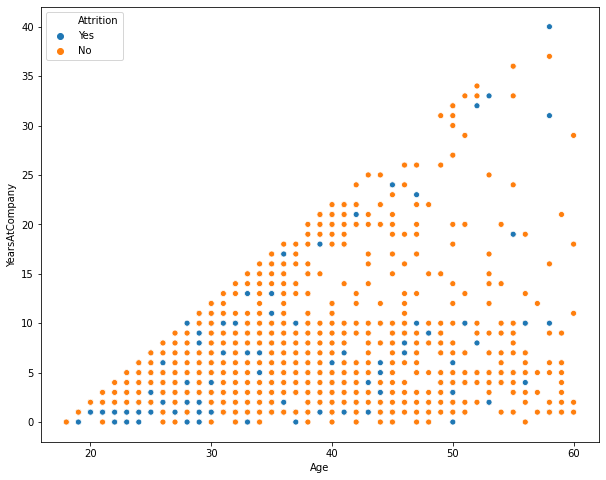

In [146]:
#YearsAtCompany and Age
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='YearsAtCompany',hue='Attrition',data=df)

# The scatterplot below shows a positive correlation between age and YearsAtCompany
# the older you get, the longer it will be in the company
# However, this plot also shows that the vulnerable aged 18th-22th, workers tend to leave the company for less than 5 years

`8. DistanceFromHome`

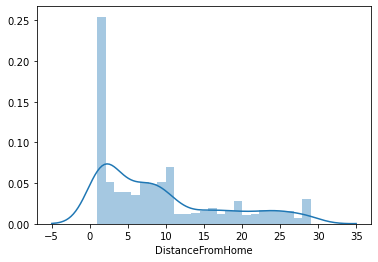

In [16]:
sns.distplot(df['DistanceFromHome'], bins=25)
plt.show()

#This code aim to visualize the distribution of DistanceFromHome

`9. Department`

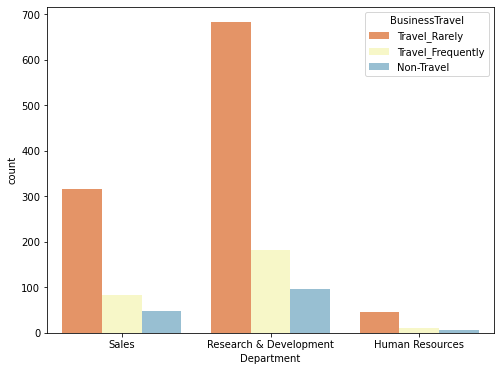

In [147]:
# BusinessTravel
plt.figure(figsize=(8,6))
sns.countplot(x=df['Department'], palette='RdYlBu', hue=df['BusinessTravel'])

#This plot aim to know which department that have Travel_Frequently
#The results show that Research & Development have the highest Travel_Frequently

In [150]:
((pd.crosstab(index = [df['Department'], df['WorkLifeBalance']], columns=df['Attrition'], normalize='index', margins=True))*100).round(2)

#This code aim to know which Department that have highest Attrition in Bad WorkLifeBalance
#The results show that Sales Department have the highest Attrition around 37.5%, followed by Research & Development around 31.67%

Attrition                                   No    Yes
Department             WorkLifeBalance               
Human Resources        Bad              100.00   0.00
                       Best              90.00  10.00
                       Better            78.57  21.43
                       Good              71.43  28.57
Research & Development Bad               68.33  31.67
                       Best              84.62  15.38
                       Better            88.17  11.83
                       Good              86.38  13.62
Sales                  Bad               62.50  37.50
                       Best              76.92  23.08
                       Better            81.88  18.12
                       Good              76.47  23.53
All                                      83.88  16.12

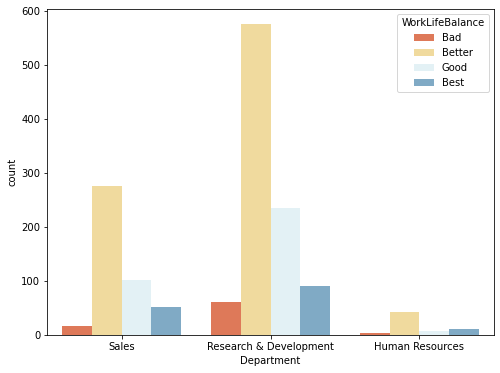

In [149]:
#This code to visualize Department feature by WorkLifeBalance
plt.figure(figsize=(8,6))
sns.countplot(x=df['Department'], palette='RdYlBu', hue=df['WorkLifeBalance'])

In [175]:
pd.crosstab(index=[df['JobSatisfaction'], df['JobRole']], columns=df['Attrition'])

#This code aim to know JobRole that have high Attrition from Low JobSatisfaction 

Attrition                                  No  Yes
JobSatisfaction JobRole                           
High            Healthcare Representative  42    1
                Human Resources            10    3
                Laboratory Technician      54   21
                Manager                    26    1
                Manufacturing Director     45    4
                Research Director          26    1
                Research Scientist         75   15
                Sales Executive            73   18
                Sales Representative       18    9
Low             Healthcare Representative  24    2
                Human Resources             5    5
                Laboratory Technician      36   20
                Manager                    20    1
                Manufacturing Director     24    2
                Research Director          15    0
                Research Scientist         41   13
                Sales Executive            53   16
                Sales Representative        5    7
Medium          Healthcare Representative  17    2
                Human Resources            14    2
                Laboratory Technician      40    8
                Manager                    19    2
                Manufacturing Director     30    2
                Research Director          15    1
                Research Scientist         43   10
                Sales Executive            45    9
                Sales Representative       11   10
Very High       Healthcare Representative  39    4
                Human Resources            11    2
                Laboratory Technician      67   13
                Manager                    32    1
                Manufacturing Director     36    2
                Research Director          22    0
                Research Scientist         86    9
                Sales Executive            98   14
                Sales Representative       16    7

`Conclusion:`
- Employees who have Low Environtment Satisfaction tend to leave from workplace. The percentage reach 25.35%
- Employees who have Low Job Involvement tend to leave from workplace. The percentage of Attrition reach 33.73% while employees with Very High Job Involvement has the smallest percentage of Attrition around 9.03%
- Employees who have Bad WorkLifeBalance tend to leave from workplace. Bad WorkLifeBalance could be caused by low JobInvolvement, having Travel_Frequently and OverWork
- Employees who have Low Job Satisfaction tend to leave from workplace. The percentage of Attrition reach 22.84%

`Suggestion:`
- Since mostly Attrition comes from Low Environtment Satisfaction, Employers should improve the work environtment including culture-fit, facilities, safety.
- Low Job Involvement could effect on employee performance. So to improve employee who have Low JobInvolvement, Employers could adding more Training Times about the job itself or training that could gain motivated for employeer
- Since Employees who have Bad WorkLifeBalance could be caused by having Travel Frequently and OverWork, so the employers should re-scheduling for the employees or even making policies that fit-well to employees
- To prevent Low Job Satisfaction of employees, Employers should be better when hiring or placing minimum experience >2 years for every JobRole especially Laboratory Technician and show clearly job previews for the job seeker so it could prevent misconception of what will the employee do.